#Link the notebook to Kaggle and download the dataset

In [0]:
!pip install -q kaggle

In [2]:
from google.colab import files

files.upload()  #path to the kaggle token

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json


In [3]:
!kaggle competitions download -c digit-recognizer

  0% 0.00/9.16M [00:00<?, ?B/s]
100% 9.16M/9.16M [00:00<00:00, 84.7MB/s]
  0% 0.00/235k [00:00<?, ?B/s]
100% 235k/235k [00:00<00:00, 72.3MB/s]
  0% 0.00/6.09M [00:00<?, ?B/s]
100% 6.09M/6.09M [00:00<00:00, 100MB/s]


In [4]:
!unzip train.csv.zip
!unzip test.csv.zip
!ls

Archive:  train.csv.zip
  inflating: train.csv               
Archive:  test.csv.zip
  inflating: test.csv                
kaggle.json  sample_submission.csv  test.csv.zip  train.csv.zip
sample_data  test.csv		    train.csv


# Useful libraries

In [0]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import pandas as pd

#data scaling
from sklearn.preprocessing import StandardScaler

# Visualization

In [6]:
#Visualize the data
data_train = pd.read_csv("train.csv")
data_train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


A lot of zeros because the digit is usually written in the center of the picture, so the edges are completely black.

We can directly restore the first picture to visualize it easier:

In [0]:
#split the data between the imputs and the outputs

X_train = data_train.drop(columns = ["label"]).values
y_train = data_train["label"].values

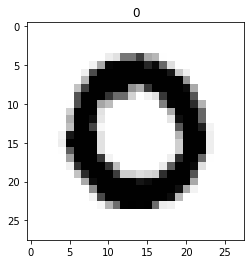

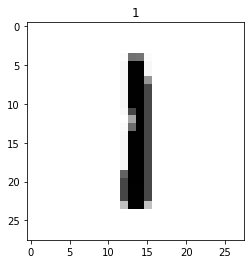

In [8]:
#first example

display_example1 = X_train[1].reshape(28,28)
plt.imshow(255-display_example1, cmap='gray', vmin=0, vmax=255)
plt.title(y_train[1])
plt.show()

#second example

display_example2 = X_train[2].reshape(28,28)
plt.imshow(255-display_example2, cmap='gray', vmin=0, vmax=255)
plt.title(y_train[2])
plt.show()

In [0]:
#Normalize the data

X_train = X_train.astype(float)
y_train = y_train.astype(float)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

# Simple Neural Network


Create the model:

In [0]:
# Flatten
model = tf.keras.models.Sequential()

# Add the layers
model.add(tf.keras.layers.Dense(256, activation="relu"))
model.add(tf.keras.layers.Dense(128, activation="relu"))
model.add(tf.keras.layers.Dense(10, activation="softmax"))

Early stopping and checkpointer:

In [0]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_acc', patience=5)
checkpointer = tf.keras.callbacks.ModelCheckpoint(filepath='./weights.hdf5', monitor='val_acc', verbose=1, save_best_only=True)

Compile the model:

In [0]:
model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer="sgd",
    metrics=["accuracy"]
)

Train the model:

In [13]:
history = model.fit(X_train, y_train, epochs=(5), validation_split=0.20, callbacks=[early_stopping])

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Train on 33600 samples, validate on 8400 samples
Epoch 1/5
33600/33600 [==============================] - 3s 84us/sample - loss: 0.5253 - acc: 0.8522 - val_loss: 0.2840 - val_acc: 0.9173
Epoch 2/5
33600/33600 [==============================] - 3s 81us/sample - loss: 0.2209 - acc: 0.9348 - val_loss: 0.2104 - val_acc: 0.9392
Epoch 3/5
33600/33600 [==============================] - 3s 76us/sample - loss: 0.1632 - acc: 0.9525 - val_loss: 0.1839 - val_acc: 0.9460
Epoch 4/5
33600/33600 [==============================] - 3s 76us/sample - loss: 0.1306 - acc: 0.9624 - val_loss: 0.1673 - val_acc: 0.9515
Epoch 5/5
33600/33600 [==============================] - 3s 77us/sample - loss: 0.1079 - acc: 0.9694 - val_loss: 0.1591 - val_acc: 0.9537


# Convolutional Neural Network


In the following picture, we can see a classical CNN architecture.


![CNN architecture](https://miro.medium.com/max/2510/1*vkQ0hXDaQv57sALXAJquxA.jpeg)

However, we will use a slightly different one which seems to have better results. 

The CNN will be composed of a succession of 2 convolutional layers and a pooling layer, while using a ReLU activation function. 


In [0]:
#Keras
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D

In [0]:
# Reshape image in 3 dimensions (height = 28px, width = 28px , canal = 1)
X_train = X_train.reshape(-1,28,28,1)

Create the model:

In [0]:
modelCNN = tf.keras.models.Sequential()

modelCNN.add(tf.keras.layers.Conv2D(filters = 32, kernel_size = (3,3),padding = 'Same', activation ='relu', input_shape = (28,28,1)))
modelCNN.add(tf.keras.layers.Conv2D(filters = 32, kernel_size = (3,3),padding = 'Same', activation ='relu'))
modelCNN.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))

modelCNN.add(tf.keras.layers.Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', activation ='relu'))
modelCNN.add(tf.keras.layers.Conv2D(filters = 64, kernel_size = (7,7),padding = 'Same', activation ='relu'))
modelCNN.add(tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2)))

modelCNN.add(tf.keras.layers.Flatten())
modelCNN.add(tf.keras.layers.Dense(256, activation = "relu"))
modelCNN.add(tf.keras.layers.Dense(10, activation = "softmax"))

Early stopping and checkpointer:

In [0]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_acc', patience=5)
checkpointer = tf.keras.callbacks.ModelCheckpoint(filepath='./weights.hdf5', monitor='val_acc', verbose=1, save_best_only=True)

Compile the model:

In [0]:
# Compile the model
modelCNN.compile(
    loss="sparse_categorical_crossentropy",
    optimizer=tf.keras.optimizers.RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0),
    metrics=["accuracy"]
)

Create the model:

In [19]:
history = modelCNN.fit(X_train, y_train, epochs=5, validation_split=0.20, callbacks=[checkpointer])

Train on 33600 samples, validate on 8400 samples
Epoch 1/5
33472/33600 [============================>.] - ETA: 0s - loss: 0.1452 - acc: 0.9562
Epoch 00001: val_acc improved from -inf to 0.98381, saving model to ./weights.hdf5
33600/33600 [==============================] - 10s 303us/sample - loss: 0.1447 - acc: 0.9564 - val_loss: 0.0667 - val_acc: 0.9838
Epoch 2/5
33472/33600 [============================>.] - ETA: 0s - loss: 0.0495 - acc: 0.9862
Epoch 00002: val_acc improved from 0.98381 to 0.98667, saving model to ./weights.hdf5
33600/33600 [==============================] - 9s 260us/sample - loss: 0.0493 - acc: 0.9862 - val_loss: 0.0625 - val_acc: 0.9867
Epoch 3/5
33472/33600 [============================>.] - ETA: 0s - loss: 0.0361 - acc: 0.9899
Epoch 00003: val_acc did not improve from 0.98667
33600/33600 [==============================] - 9s 257us/sample - loss: 0.0360 - acc: 0.9899 - val_loss: 0.0702 - val_acc: 0.9860
Epoch 4/5
33504/33600 [============================>.] - ETA: 

# Test

Normalize the test data:

In [0]:
X_test = pd.read_csv("test.csv").values
X_test = X_test.astype(float)
X_test = scaler.fit_transform(X_test)


Only if using the CNN:

In [0]:
#different shape for the CNN
X_test = X_test.reshape(-1,28,28,1)

Predict the classes of the test data:

In [0]:
modelCNN.load_weights('weights.hdf5')

In [0]:
y_test = modelCNN.predict_classes(X_test)

Create the submission file:

In [0]:
import csv

with open('submissionCNN.csv', 'w', newline='') as file:
  writer = csv.writer(file)
  writer.writerow(["ImageId", "Label"])
  for i,e in enumerate(y_test):
    writer.writerow([i+1,e])
